## Volleyball results scrape

In [132]:
from urllib.request import urlopen
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [129]:
volleyball_results_2020 = pd.DataFrame(index=None)

opponent_list = []
date_list = []
result_list = []    
year_list = []

schedule_url = 'https://mutigers.com/sports/womens-volleyball/schedule/2020'
    # empty lists


# Set up parser
page = urlopen(schedule_url)
html = page.read().decode('utf-8')
soup = BeautifulSoup(html,"html.parser")

# pull info
otags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-name'})
dtags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-date'})
rtags = soup.find_all('div',{'class':'sidearm-schedule-game-result'})

# get result tag
for rtag in rtags:
    game_result = rtag.find('span')
    if game_result:
        game_results = rtag.text

        #store names
        result_list.append(game_results.strip().replace('\n'," "))
        print(game_results.strip().replace('\n'," ")+", year: "+schedule_url[-4:])

# get opponent tag
for otag in otags:
    opponent_name = otag.find('a')
    if opponent_name:
        opponent_names = otag.text

        # store names
        opponent_list.append(opponent_names.strip().replace("\n"," "))

        # print(opponent_names.strip())
    year_list.append(schedule_url[-4:])
# get date tag
for dtag in dtags:
    game_date = dtag.find('span')
    if game_date:
        game_dates = dtag.text

        # store names
        date_list.append(game_dates.strip().replace("\n"," "))
        # print(game_dates.strip())

W, 3-1, year: 2020
W, 3-0, year: 2020
L, 3-1, year: 2020
L, 3-1, year: 2020
W, 3-2, year: 2020
W, 3-0, year: 2020
W, 3-2, year: 2020
W, 3-1, year: 2020
W, 3-2, year: 2020
W, 3-2, year: 2020
L, 3-2, year: 2020
L, 3-0, year: 2020
W, 3-0, year: 2020
W, 3-0, year: 2020
W, 3-0, year: 2020
L, 3-1, year: 2020
L, 3-2, year: 2020
L, 3-0, year: 2020
W, 3-0, year: 2020
W, 3-2, year: 2020
W, 3-0, year: 2020
W, 3-0, year: 2020
W, 3-0, year: 2020
L, 3-0, year: 2020


In [130]:
otags

[<div class="sidearm-schedule-game-opponent-name">
 <a aria-label="Alabama on October 21 6 PM" href="http://www.rolltide.com/" target="_blank">Alabama</a>
 </div>,
 <div class="sidearm-schedule-game-opponent-name">
 <a aria-label="Alabama on October 22 8:30 PM" href="http://www.rolltide.com/" target="_blank">Alabama</a>
 </div>,
 <div class="sidearm-schedule-game-opponent-name">
 <a aria-label="(#3) Kentucky on October 28 8 PM" href="https://ukathletics.com/" target="_blank">(#3) Kentucky</a>
 </div>,
 <div class="sidearm-schedule-game-opponent-name">
 <a aria-label="(#3) Kentucky on October 29 8 PM" href="https://ukathletics.com/" target="_blank">(#3) Kentucky</a>
 </div>,
 <div class="sidearm-schedule-game-opponent-name">
 <a aria-label="(RV) Arkansas on November 4 5 PM" href="http://www.arkansasrazorbacks.com/" target="_blank">(RV) Arkansas</a>
 </div>,
 <div class="sidearm-schedule-game-opponent-name">
 <a aria-label="(RV) Arkansas on November 5 6 PM" href="http://www.arkansasrazor

In [21]:
volleyball_results_2020['opponent'] = opponent_list
volleyball_results_2020['game_full_date'] = date_list
volleyball_results_2020['game_year'] = year_list
volleyball_results_2020['game_result'] = result_list

volleyball_results_2020[['game_date','game_full_date']] = volleyball_results_2020['game_full_date'].str.split("(",expand=True)
volleyball_results_2020[['game_day_of_week','game_time']] = volleyball_results_2020['game_full_date'].str.split(")",expand=True)
volleyball_results_2020[['game_result','game_score']] = volleyball_results_2020['game_result'].str.split(',',expand=True)
volleyball_results_2020[['win_score','lost_score']] = volleyball_results_2020['game_score'].str.split('-',expand=True)

volleyball_results_2020['win_score'] = pd.to_numeric(volleyball_results_2020['win_score'])
volleyball_results_2020['lost_score'] = pd.to_numeric(volleyball_results_2020['lost_score'])

volleyball_results_2020['total_sets'] = volleyball_results_2020['win_score'] + volleyball_results_2020['lost_score']

In [22]:
volleyball_results_2020

,opponent,game_full_date,game_year,game_result,game_date,game_day_of_week,game_time,game_score,win_score,lost_score,total_sets
0,Alabama,Wed) 6 PM,2020,W,Oct 21,Wed,6 PM,3-1,3,1,4
1,Alabama,Thu) 8:30 PM,2020,W,Oct 22,Thu,8:30 PM,3-0,3,0,3
2,(#3) Kentucky,Wed) 8 PM,2020,L,Oct 28,Wed,8 PM,3-1,3,1,4
3,(#3) Kentucky,Thu) 8 PM,2020,L,Oct 29,Thu,8 PM,3-1,3,1,4
4,(RV) Arkansas,Wed) 5 PM,2020,W,Nov 4,Wed,5 PM,3-2,3,2,5
5,(RV) Arkansas,Thu) 6 PM,2020,W,Nov 5,Thu,6 PM,3-0,3,0,3
6,Ole Miss,Fri) Noon,2020,W,Nov 20,Fri,Noon,3-2,3,2,5
7,Ole Miss,Sat) Noon,2020,W,Nov 21,Sat,Noon,3-1,3,1,4
8,LSU,Fri) 6 PM,2020,W,Jan 29,Fri,6 PM,3-2,3,2,5
9,LSU,Sat) 8 PM,2020,W,Jan 30,Sat,8 PM,3-2,3,2,5


In [23]:
pd.crosstab(index = volleyball_results_2020['total_sets'], columns = volleyball_results_2020['game_result'])

game_result,L,W
total_sets,,
3,3,9
4,3,2
5,2,5


In [24]:
pd.crosstab(index = volleyball_results_2020['game_day_of_week'], columns = volleyball_results_2020['game_result'])

game_result,L,W
game_day_of_week,,
Fri,2,5
Sat,3,4
Thu,2,3
Wed,1,4


### Volleyball historical record

In [155]:
years = []
for year in range(2015,2021):
    years.append(str(year))

In [156]:
base_schedule_url = 'https://mutigers.com/sports/womens-volleyball/schedule/'
schedule_urls = []
for year in years:
    miz_schedule_url = base_schedule_url+year
    schedule_urls.append(miz_schedule_url)

In [157]:
print(schedule_urls)

['https://mutigers.com/sports/womens-volleyball/schedule/2015', 'https://mutigers.com/sports/womens-volleyball/schedule/2016', 'https://mutigers.com/sports/womens-volleyball/schedule/2017', 'https://mutigers.com/sports/womens-volleyball/schedule/2018', 'https://mutigers.com/sports/womens-volleyball/schedule/2019', 'https://mutigers.com/sports/womens-volleyball/schedule/2020']


In [158]:
miz_hist_record = pd.DataFrame(index=None)
opponent_list = []
date_list = []
result_list = []    
year_list = []

for schedule_url in schedule_urls:
    # empty lists

    
    # Set up parser
    page = urlopen(schedule_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html,"html.parser")
    
    # pull info
    otags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-name'})
    dtags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-date'})
    rtags = soup.find_all('div',{'class':'sidearm-schedule-game-result'})
    
    # get result tag
    for rtag in rtags[1:]:
        game_result = rtag.find('span')
        if game_result:
            game_results = rtag.text
            
            #store names
            result_list.append(game_results.strip().replace('\n'," "))
            # print(game_results.strip().replace('\n'," ")+", year: "+schedule_url[-4:])
            
    # get opponent tag
    for otag in otags[1:]:
        opponent_name = otag.find('a')
        if opponent_name:
            opponent_names = otag.text
            
            # store names
            opponent_list.append(opponent_names.strip().replace("\n"," "))
            
           # print(opponent_names.strip())
        year_list.append(schedule_url[-4:])
    # get date tag
    for dtag in dtags[1:]:
        game_date = dtag.find('span')
        if game_date:
            game_dates = dtag.text
            
            # store names
            date_list.append(game_dates.strip().replace("\n"," "))
            # print(game_dates.strip())
    

In [159]:
len(opponent_list[:])

186

In [160]:
len(result_list[:])

186

In [161]:
miz_hist_record['opponent'] = opponent_list
miz_hist_record['game_full_date'] = date_list
miz_hist_record['game_year'] = year_list
miz_hist_record['game_result'] = result_list

miz_hist_record[['game_date','game_full_date']] = miz_hist_record['game_full_date'].str.split("(",expand=True,n=1)
miz_hist_record[['game_day_of_week','game_time']] = miz_hist_record['game_full_date'].str.split(")",expand=True,n=1)
miz_hist_record[['game_result','game_score']] = miz_hist_record['game_result'].str.split(',',expand=True)
miz_hist_record[['win_score','lost_score']] = miz_hist_record['game_score'].str.split('-',expand=True)

miz_hist_record['win_score'] = pd.to_numeric(miz_hist_record['win_score'])
miz_hist_record['lost_score'] = pd.to_numeric(miz_hist_record['lost_score'])

miz_hist_record['total_sets'] = miz_hist_record['win_score'] + miz_hist_record['lost_score']

In [163]:
miz_hist_record[-24:]

,opponent,game_full_date,game_year,game_result,game_date,game_day_of_week,game_time,game_score,win_score,lost_score,total_sets
162,(#5) Nebraska,Sat) 7 PM,2019,L,Dec 7,Sat,7 PM,3-1,3,1,4
163,Alabama,Thu) 8:30 PM,2020,W,Oct 22,Thu,8:30 PM,3-0,3,0,3
164,(#3) Kentucky,Wed) 8 PM,2020,L,Oct 28,Wed,8 PM,3-1,3,1,4
165,(#3) Kentucky,Thu) 8 PM,2020,L,Oct 29,Thu,8 PM,3-1,3,1,4
166,(RV) Arkansas,Wed) 5 PM,2020,W,Nov 4,Wed,5 PM,3-2,3,2,5
167,(RV) Arkansas,Thu) 6 PM,2020,W,Nov 5,Thu,6 PM,3-0,3,0,3
168,Ole Miss,Fri) Noon,2020,W,Nov 20,Fri,Noon,3-2,3,2,5
169,Ole Miss,Sat) Noon,2020,W,Nov 21,Sat,Noon,3-1,3,1,4
170,LSU,Fri) 6 PM,2020,W,Jan 29,Fri,6 PM,3-2,3,2,5
171,LSU,Sat) 8 PM,2020,W,Jan 30,Sat,8 PM,3-2,3,2,5


In [94]:
pd.crosstab(index = miz_hist_record['game_year'], columns = miz_hist_record['game_result'])

game_result,L,W
game_year,,
2015,6,27
2016,6,27
2017,12,22
2018,8,24
2019,9,22
2020,8,15


In [145]:
opponent = 'Saint Louis'
vs_opponent = miz_hist_record[miz_hist_record['opponent'].str.contains(opponent)]
vs_opponent

,opponent,game_full_date,game_year,game_result,game_date,game_day_of_week,game_time,game_score,win_score,lost_score,total_sets
12,Saint Louis,Wed) 7:00 PM,2015,L,Sep 23,Wed,7:00 PM,3-0,3,0,3


In [96]:
pd.crosstab(index = miz_hist_record['total_sets'], columns = miz_hist_record['game_result'])

game_result,L,W
total_sets,,
3,18,65
4,18,43
5,13,29


### Record Scrape 2

In [134]:
rec_years = []
for year in range(1988,2021):
    rec_years.append(str(year))

In [135]:
base_schedule_url = 'https://mutigers.com/sports/womens-volleyball/schedule/'
schedule_urls = []
for year in rec_years:
    miz_schedule_url = base_schedule_url+year
    schedule_urls.append(miz_schedule_url)

In [136]:
print(schedule_urls)

['https://mutigers.com/sports/womens-volleyball/schedule/1988', 'https://mutigers.com/sports/womens-volleyball/schedule/1989', 'https://mutigers.com/sports/womens-volleyball/schedule/1990', 'https://mutigers.com/sports/womens-volleyball/schedule/1991', 'https://mutigers.com/sports/womens-volleyball/schedule/1992', 'https://mutigers.com/sports/womens-volleyball/schedule/1993', 'https://mutigers.com/sports/womens-volleyball/schedule/1994', 'https://mutigers.com/sports/womens-volleyball/schedule/1995', 'https://mutigers.com/sports/womens-volleyball/schedule/1996', 'https://mutigers.com/sports/womens-volleyball/schedule/1997', 'https://mutigers.com/sports/womens-volleyball/schedule/1998', 'https://mutigers.com/sports/womens-volleyball/schedule/1999', 'https://mutigers.com/sports/womens-volleyball/schedule/2000', 'https://mutigers.com/sports/womens-volleyball/schedule/2001', 'https://mutigers.com/sports/womens-volleyball/schedule/2002', 'https://mutigers.com/sports/womens-volleyball/schedul

In [137]:
miz_hist_record_full = pd.DataFrame(index=None)
record_list = []
rec_year_list = []

for schedule_url in schedule_urls:
    # empty lists

    
    # Set up parser
    page = urlopen(schedule_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html,"html.parser")
    
    # pull info
    otags = soup.find_all('ul',{"class":'flex-wrap'})
    # dtags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-date'})
    # rtags = soup.find_all('div',{'class':'sidearm-schedule-game-result'})
    
    # get result tag
   # for rtag in rtags[1:]:
    #    game_result = rtag.find('span')
     #   if game_result:
      #      game_results = rtag.text
       #     
        #    #store names
         #   result_list.append(game_results.strip().replace('\n'," "))
            # print(game_results.strip().replace('\n'," ")+", year: "+schedule_url[-4:])
            
    # get opponent tag
    for otag in otags[:]:
        records = otag.find('li',{'class':'flex-column'})
        if records:
            o_rec = records.text
            record_list.append(o_rec.strip()[8:])
         #   print(o_rec.strip()[8:])
        
        #for record in records:
         #   overall = record.find('span',{'class':'flex-item-1'})
          #  if overall:
           #     o_rec = record.text
            #    print(o_rec)
            
           # print(opponent_names.strip())
    rec_year_list.append(schedule_url[-4:])
    # get date tag
  #  for dtag in dtags[1:]:
   #     game_date = dtag.find('span')
    #    if game_date:
     #       game_dates = dtag.text
            
            # store names
      #      date_list.append(game_dates.strip().replace("\n"," "))
            # print(game_dates.strip())
    

In [138]:
miz_hist_record_full['year'] = rec_year_list
miz_hist_record_full['wins'] = record_list

miz_hist_record_full[['wins','losses']] = miz_hist_record_full['wins'].str.split('-',expand=True,n=1)


In [139]:
#miz_hist_record_full['year'] = pd.to_numeric(miz_hist_record_full['year'])
miz_hist_record_full['wins'] = pd.to_numeric(miz_hist_record_full['wins'])
miz_hist_record_full['losses'] = pd.to_numeric(miz_hist_record_full['losses'])
miz_hist_record_full['total_games'] = (miz_hist_record_full['wins'] + miz_hist_record_full['losses'])
miz_hist_record_full['total_games'] = pd.to_numeric(miz_hist_record_full['total_games'])

In [140]:
miz_hist_record_full['win_pct'] = miz_hist_record_full['wins'] / miz_hist_record_full['total_games']

In [141]:
miz_hist_record_full

,year,wins,losses,total_games,win_pct
0,1988,14,18,32,0.437500
1,1989,6,27,33,0.181818
2,1990,9,19,28,0.321429
3,1991,10,22,32,0.312500
4,1992,22,11,33,0.666667
5,1993,10,18,28,0.357143
6,1994,9,24,33,0.272727
7,1995,6,25,31,0.193548
8,1996,0,28,28,0.000000
9,1997,15,20,35,0.428571


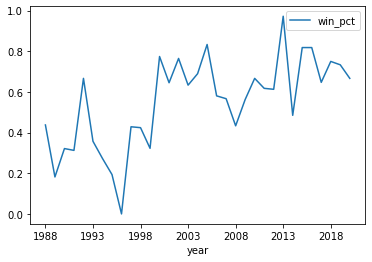

In [142]:
miz_hist_record_full.plot(x="year", y="win_pct")
plt.show()

In [144]:
sum(miz_hist_record_full['wins'][-2:]) / sum(miz_hist_record_full['total_games'][-2:])

0.7037037037037037

### MIZ Season Openers

In [151]:
miz_so = pd.DataFrame(index=None)
opponent_list_so = []
date_list_so = []
result_list_so = []    
year_list_so = []

for schedule_url in schedule_urls:
    # empty lists

    
    # Set up parser
    page = urlopen(schedule_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html,"html.parser")
    
    # pull info
    otags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-name'})
    dtags = soup.find_all('div',{"class":'sidearm-schedule-game-opponent-date'})
    rtags = soup.find_all('div',{'class':'sidearm-schedule-game-result'})
    
    # get result tag
    for rtag in rtags[1:3]:
        game_result = rtag.find('span')
        if game_result:
            game_results = rtag.text
            
            #store names
            result_list_so.append(game_results.strip().replace('\n'," "))
            # print(game_results.strip().replace('\n'," ")+", year: "+schedule_url[-4:])
            
    # get opponent tag
    for otag in otags[1:3]:
        opponent_name = otag.find('a')
        if opponent_name:
            opponent_names = otag.text
            
            # store names
            opponent_list_so.append(opponent_names.strip().replace("\n"," "))
            
           # print(opponent_names.strip())
        year_list.append(schedule_url[-4:])
    # get date tag
    for dtag in dtags[1:3]:
        game_date = dtag.find('span')
        if game_date:
            game_dates = dtag.text
            
            # store names
            date_list_so.append(game_dates.strip().replace("\n"," "))
            # print(game_dates.strip())
    

In [152]:
len(opponent_list_so)

66

## Set statistics

In [164]:
set_csv = pd.read_csv('https://raw.githubusercontent.com/gcdean38/MSM_python/edits/kcou/volleyball/miz_vb_2020_set_res.csv')

In [177]:
set_csv.head()

,opponent,miz_set_score,opp_set_score,miz_sets,opp_sets,set_res,set_num,match_res,set_score
0,Alabama,25,22,0,0,W,1,W,0-0
1,Alabama,25,18,1,0,W,2,W,1-0
2,Alabama,17,25,2,0,L,3,W,2-0
3,Alabama,28,26,2,1,W,4,W,2-1
4,Alabama,25,16,0,0,W,1,W,0-0


In [175]:
set_csv['set_score'] = set_csv['miz_sets'].astype(str) + "-" + set_csv['opp_sets'].astype(str)

In [176]:
set_csv.dtypes

opponent         object
miz_set_score     int64
opp_set_score     int64
miz_sets          int64
opp_sets          int64
set_res          object
set_num           int64
match_res        object
set_score        object
dtype: object

In [178]:
sets_result = pd.crosstab(index = set_csv['set_score'],columns = set_csv['match_res'])

In [179]:
sets_result

match_res,L,W
set_score,,
0-0,7,17
0-1,4,3
0-2,3,0
1-0,3,14
1-1,3,5
1-2,2,2
2-0,1,12
2-1,2,6
2-2,2,5


## Regular Season Set Analysis\
### all elements with "_rs" suffix

In [185]:
set_csv_rs = set_csv[:-6]

In [186]:
set_csv_rs

,opponent,miz_set_score,opp_set_score,miz_sets,opp_sets,set_res,set_num,match_res,set_score
0,Alabama,25,22,0,0,W,1,W,0-0
1,Alabama,25,18,1,0,W,2,W,1-0
2,Alabama,17,25,2,0,L,3,W,2-0
3,Alabama,28,26,2,1,W,4,W,2-1
4,Alabama,25,16,0,0,W,1,W,0-0
...,...,...,...,...,...,...,...,...,...
80,Mississippi St.,25,16,1,0,W,2,W,1-0
81,Mississippi St.,25,18,2,0,W,3,W,2-0
82,Mississippi St.,25,23,0,0,W,1,W,0-0
83,Mississippi St.,25,20,1,0,W,2,W,1-0


In [187]:
set_csv_rs['set_score'] = set_csv_rs['miz_sets'].astype(str) + "-" + set_csv_rs['opp_sets'].astype(str)

<ipython-input-187-22f521a11d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_csv_rs['set_score'] = set_csv_rs['miz_sets'].astype(str) + "-" + set_csv_rs['opp_sets'].astype(str)


In [188]:
set_csv_rs

,opponent,miz_set_score,opp_set_score,miz_sets,opp_sets,set_res,set_num,match_res,set_score
0,Alabama,25,22,0,0,W,1,W,0-0
1,Alabama,25,18,1,0,W,2,W,1-0
2,Alabama,17,25,2,0,L,3,W,2-0
3,Alabama,28,26,2,1,W,4,W,2-1
4,Alabama,25,16,0,0,W,1,W,0-0
...,...,...,...,...,...,...,...,...,...
80,Mississippi St.,25,16,1,0,W,2,W,1-0
81,Mississippi St.,25,18,2,0,W,3,W,2-0
82,Mississippi St.,25,23,0,0,W,1,W,0-0
83,Mississippi St.,25,20,1,0,W,2,W,1-0


### Result by set situation

In [204]:
set_score_result_rs = pd.crosstab(index = set_csv_rs['set_score'],columns = set_csv_rs['match_res'])
set_score_result_rs

match_res,L,W
set_score,,
0-0,6,16
0-1,3,3
0-2,2,0
1-0,3,13
1-1,3,5
1-2,2,2
2-0,1,11
2-1,2,6
2-2,2,5


In [205]:
set_score_result_rs_pct = pd.crosstab(index = set_csv_rs['set_score'],columns = set_csv_rs['match_res'],normalize = 'index')
set_score_result_rs_pct

match_res,L,W
set_score,,
0-0,0.272727,0.727273
0-1,0.500000,0.500000
0-2,1.000000,0.000000
1-0,0.187500,0.812500
1-1,0.375000,0.625000
1-2,0.500000,0.500000
2-0,0.083333,0.916667
2-1,0.250000,0.750000
2-2,0.285714,0.714286


In [206]:
0.727273*0.812500

0.5909093125

### Result by set

In [195]:
set_res_rs = pd.crosstab(index = set_csv_rs['set_num'], columns = set_csv_rs['set_res'])
set_res_rs

set_res,L,W
set_num,,
1,6,16
2,6,16
3,10,12
4,9,3
5,2,5


### Average opponent score by match result

In [200]:
opp_set_score = pd.crosstab(index = set_csv_rs['match_res'], columns = set_csv_rs['match_res'], values = set_csv_rs['opp_set_score'], aggfunc='mean')
opp_set_score

match_res,L,W
match_res,,
L,24.0,NaN
W,NaN,19.901639


### Average Mizzou score by match result

In [201]:
miz_set_score = pd.crosstab(index = set_csv_rs['match_res'], columns = set_csv_rs['match_res'], values = set_csv_rs['miz_set_score'], aggfunc='mean')
miz_set_score

match_res,L,W
match_res,,
L,20.75,NaN
W,NaN,23.409836
